In [1]:
import pandas as pd
import numpy as np

In [4]:
url='https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'

In [12]:
fuel_data=pd.read_csv(url,  on_bad_lines='skip')
fuel_data.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_1994_12_1_0_7,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [9]:
fuel_data.isnull().sum() #missing valuescheck

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [13]:
fuel_data.groupby('fuel_unit')['fuel_unit'].count()
fuel_data[['fuel_unit']]=fuel_data[['fuel_unit']].fillna(value='mcf')

In [14]:
fuel_data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [17]:
fuel_data.groupby('report_year')['report_year'].count() #group bu fuel type code year and print the first entries in all the groups formed

report_year
1994    1235
1995    1201
1996    1088
1997    1094
1998    1107
1999    1050
2000    1373
2001    1356
2002    1205
2003    1211
2004    1192
2005    1269
2006    1243
2007    1264
2008    1228
2009    1222
2010    1261
2011    1240
2012    1243
2013    1199
2014    1171
2015    1093
2016    1034
2017     993
2018     951
Name: report_year, dtype: int64

In [19]:
fuel_data.groupby('fuel_type_code_pudl').first()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,,
coal,f1_fuel_1994_12_1_0_7,1,1994,rockport,ton,5377489.0,16.590000,18.590,18.530,1.121
gas,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,mcf,40533.0,1.000000,2.770,2.770,2.570
nuclear,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,kgU,2260.0,0.064094,28.770,0.000,0.450
oil,f1_fuel_1994_12_6_0_2,6,1994,clinch river,bbl,6510.0,5.875338,32.130,23.444,5.469
other,f1_fuel_1994_12_11_0_6,11,1994,w.f. wyman,bbl,55652.0,0.149719,14.685,15.090,2.335
waste,f1_fuel_1994_12_9_0_3,9,1994,b.l. england,ton,2438.0,0.015939,34.180,34.180,1.072


In [20]:
fuel_df1=fuel_data.iloc[0:19000].reset_index(drop=True)
fuel_df2=fuel_data.iloc[19000:].reset_index(drop=True)

In [23]:
assert len(fuel_data)==(len(fuel_df1)+len(fuel_df2))

In [26]:
pd.merge(fuel_df1, fuel_df2, how="inner")

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu


In [25]:
pd.merge(fuel_df1, fuel_df2, how="outer")

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


In [27]:
pd.merge(fuel_df1, fuel_df2, how="left")

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590000,18.590,18.530,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592000,18.580,18.530,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130000,39.720,38.120,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950000,47.210,45.990,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000000,2.770,2.770,2.570
...,...,...,...,...,...,...,...,...,...,...,...
18995,f1_fuel_2009_12_182_1_9,182,2009,lake road,gas,mcf,340857.0,1.000000,4.711,4.711,4.711
18996,f1_fuel_2009_12_182_1_10,182,2009,lake road,oil,mcf,771.0,5.801544,84.899,84.899,14.634
18997,f1_fuel_2009_12_182_1_13,182,2009,iatan (18%),coal,ton,414142.0,16.718000,18.509,17.570,1.107
18998,f1_fuel_2009_12_182_1_14,182,2009,iatan (18%),oil,bbl,5761.0,5.537910,83.636,72.280,15.102


In [28]:
dummydata=pd.DataFrame()

In [30]:
pd.concat([fuel_data,dummydata]).reset_index(drop=True)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


In [32]:
fuel_data.duplicated().any()

False

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'fuel_unit')

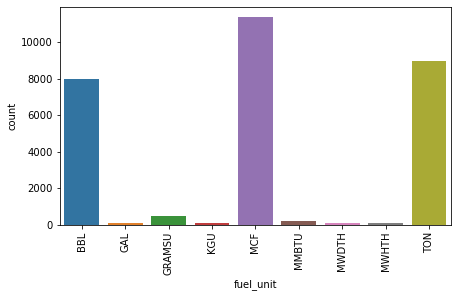

In [39]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=90)
fuel_unit=pd.DataFrame({'unit':['BBL','GAL','GRAMSU','KGU','MCF', 'MMBTU','MWDTH','MWHTH','TON'],
                        'count':[7998,84,464,110,11354,180,95,100,8958]})
sns.barplot(data=fuel_unit, x='unit', y='count')
plt.xlabel('fuel_unit')

Text(0.5, 0, 'Fuel Unit')

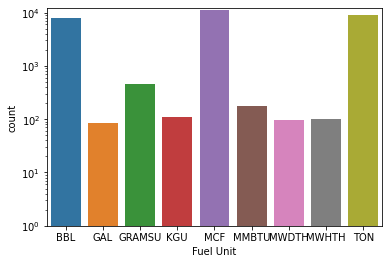

In [41]:
g=sns.barplot(data=fuel_unit, x='unit', y='count')
g.set_yscale("log")
g.set_ylim(1,12000)
plt.xlabel('Fuel Unit')